In [35]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [36]:
# pembuatan semesta

x_curah_hujan = np.arange(0, 700, 1)

x_luas_lahan = np.arange(12000, 30000, 1)

x_tingkat_permintaan = np.arange(3003550, 4200000)

x_produksi_bumbu_dapur = np.arange(2300, 2800000, 1)

In [37]:
curah_hujan_rendah = fuzz.trapmf(x_curah_hujan, [0, 0, 31, 360])
curah_hujan_sedang = fuzz.trimf(x_curah_hujan, [250, 359.5, 469])
curah_hujan_tinggi = fuzz.trapmf(x_curah_hujan, [360, 689, 700, 700])

luas_lahan_kecil = fuzz.trapmf(x_luas_lahan, [0, 0, 12500, 20964])
luas_lahan_sedang = fuzz.trimf(x_luas_lahan, [18163, 20964.5, 23766])
luas_lahan_besar = fuzz.trapmf(x_luas_lahan, [20964, 29368, 30000, 30000])

tingkat_permintaan_rendah = fuzz.trapmf(x_tingkat_permintaan, [0, 0, 3003550, 4200000])
tingkat_permintaan_tinggi = fuzz.trapmf(x_tingkat_permintaan, [3003550, 4200000, 4200000, 4200000])

produksi_bumbu_dapur_sedikit = fuzz.trapmf(x_produksi_bumbu_dapur, [0, 0, 2300, 1401150])
produksi_bumbu_dapur_sedang = fuzz.trimf(x_produksi_bumbu_dapur, [934867, 1401150.5, 1867434])
produksi_bumbu_dapur_banyak = fuzz.trapmf(x_produksi_bumbu_dapur, [1401150, 2800000, 2800000, 2800000])

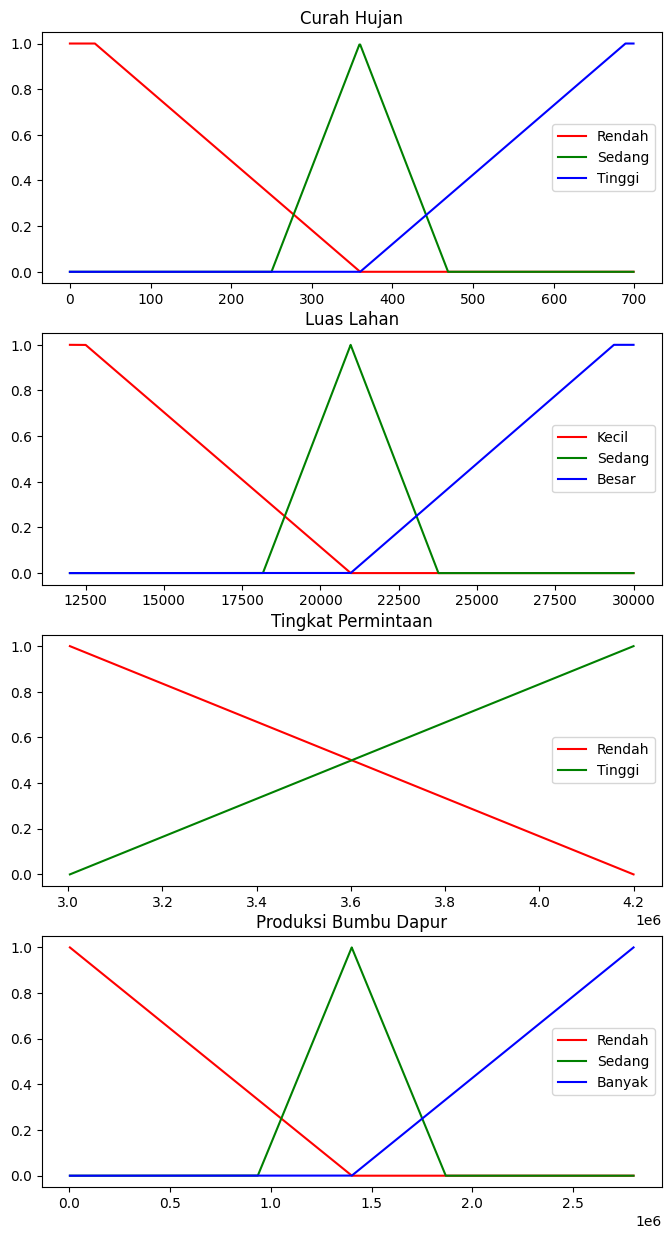

In [38]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,15))
ax0.plot(x_curah_hujan, curah_hujan_rendah, 'r', linewidth=1.5, label='Rendah')
ax0.plot(x_curah_hujan, curah_hujan_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_curah_hujan, curah_hujan_tinggi, 'b', linewidth=1.5, label='Tinggi')
ax0.set_title('Curah Hujan')
ax0.legend()

ax1.plot(x_luas_lahan, luas_lahan_kecil, 'r', linewidth=1.5, label='Kecil')
ax1.plot(x_luas_lahan, luas_lahan_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_luas_lahan, luas_lahan_besar, 'b', linewidth=1.5, label='Besar')
ax1.set_title('Luas Lahan')
ax1.legend()

ax2.plot(x_tingkat_permintaan, tingkat_permintaan_rendah, 'r', linewidth=1.5, label='Rendah')
ax2.plot(x_tingkat_permintaan, tingkat_permintaan_tinggi, 'g', linewidth=1.5, label='Tinggi')
ax2.set_title('Tingkat Permintaan')
ax2.legend()

ax3.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedikit, 'r', linewidth=1.5, label='Rendah')
ax3.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedang, 'g', linewidth=1.5, label='Sedang')
ax3.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_banyak, 'b', linewidth=1.5, label='Banyak')
ax3.set_title('Produksi Bumbu Dapur')
ax3.legend()

In [39]:
# fuzzification

curah_hujan_level_rendah = fuzz.interp_membership(x_curah_hujan, curah_hujan_rendah, 200)
curah_hujan_level_sedang = fuzz.interp_membership(x_curah_hujan, curah_hujan_sedang, 200)
curah_hujan_level_tinggi = fuzz.interp_membership(x_curah_hujan, curah_hujan_tinggi, 200)

luas_lahan_level_kecil = fuzz.interp_membership(x_luas_lahan, luas_lahan_kecil, 15000)
luas_lahan_level_sedang = fuzz.interp_membership(x_luas_lahan, luas_lahan_sedang, 15000)
luas_lahan_level_besar = fuzz.interp_membership(x_luas_lahan, luas_lahan_besar, 15000)

tingkat_permintaan_level_rendah = fuzz.interp_membership(x_tingkat_permintaan, tingkat_permintaan_rendah, 3800000)
tingkat_permintaan_level_tinggi = fuzz.interp_membership(x_tingkat_permintaan, tingkat_permintaan_tinggi, 3800000)


print(curah_hujan_level_rendah, curah_hujan_level_sedang, curah_hujan_level_tinggi)
print(luas_lahan_level_kecil, luas_lahan_level_sedang, luas_lahan_level_besar)
print(tingkat_permintaan_level_rendah, tingkat_permintaan_level_tinggi)

0.48632218844984804 0.0 0.0
0.7046313799621928 0.0 0.0
0.33432237034560575 0.6656776296543943


In [40]:
# sedikit
active_rule1 = min(curah_hujan_level_rendah, luas_lahan_level_kecil, tingkat_permintaan_level_rendah)
# sedang
active_rule2 = min(curah_hujan_level_rendah, luas_lahan_level_kecil, tingkat_permintaan_level_tinggi)
# sedikit 
active_rule3 = min(curah_hujan_level_rendah, luas_lahan_level_sedang, tingkat_permintaan_level_rendah)
# banyak
active_rule4 = min(curah_hujan_level_rendah, luas_lahan_level_sedang, tingkat_permintaan_level_tinggi)
# sedikit
active_rule5 = min(curah_hujan_level_rendah, luas_lahan_level_besar, tingkat_permintaan_level_rendah)
# sedang
active_rule6 = min(curah_hujan_level_rendah, luas_lahan_level_besar, tingkat_permintaan_level_tinggi)
# sedikit
active_rule7 = min(curah_hujan_level_sedang, luas_lahan_level_kecil, tingkat_permintaan_level_rendah)
# banyak
active_rule8 = min(curah_hujan_level_sedang, luas_lahan_level_kecil, tingkat_permintaan_level_tinggi)
# sedang
active_rule9 = min(curah_hujan_level_sedang, luas_lahan_level_sedang, tingkat_permintaan_level_rendah)
# banyak
active_rule10 = min(curah_hujan_level_sedang, luas_lahan_level_sedang, tingkat_permintaan_level_tinggi)
# sedang
active_rule11 = min(curah_hujan_level_sedang, luas_lahan_level_besar, tingkat_permintaan_level_rendah)
# banyak
active_rule12 = min(curah_hujan_level_sedang, luas_lahan_level_besar, tingkat_permintaan_level_tinggi)
# sedikit
active_rule13 = min(curah_hujan_level_tinggi, luas_lahan_level_kecil, tingkat_permintaan_level_rendah)
# sedang
active_rule14 = min(curah_hujan_level_tinggi, luas_lahan_level_kecil, tingkat_permintaan_level_tinggi)
# sedang
active_rule15 = min(curah_hujan_level_tinggi, luas_lahan_level_sedang, tingkat_permintaan_level_rendah)
# banyak
active_rule16 = min(curah_hujan_level_tinggi, luas_lahan_level_sedang, tingkat_permintaan_level_tinggi)
# sedikit
active_rule17 = min(curah_hujan_level_tinggi, luas_lahan_level_besar, tingkat_permintaan_level_rendah)
# banyak
active_rule18 = min(curah_hujan_level_tinggi, luas_lahan_level_besar, tingkat_permintaan_level_tinggi)

print(active_rule1, active_rule2, active_rule3, active_rule4, active_rule5, active_rule6, active_rule7, active_rule8, active_rule9, active_rule10, active_rule11, active_rule12, active_rule13, active_rule14, active_rule15, active_rule16, active_rule17, active_rule18)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
produksi_activation_r1 = np.fmin(active_rule1, produksi_bumbu_dapur_sedikit)
produksi_activation_r2 = np.fmin(active_rule2, produksi_bumbu_dapur_sedang)
produksi_activation_r3 = np.fmin(active_rule3, produksi_bumbu_dapur_sedikit)
produksi_activation_r4 = np.fmin(active_rule4, produksi_bumbu_dapur_banyak)
produksi_activation_r5 = np.fmin(active_rule5, produksi_bumbu_dapur_sedikit)
produksi_activation_r6 = np.fmin(active_rule6, produksi_bumbu_dapur_sedang)
produksi_activation_r7 = np.fmin(active_rule7, produksi_bumbu_dapur_sedikit)
produksi_activation_r8 = np.fmin(active_rule8, produksi_bumbu_dapur_banyak)
produksi_activation_r9 = np.fmin(active_rule9, produksi_bumbu_dapur_sedang)
produksi_activation_r10 = np.fmin(active_rule10, produksi_bumbu_dapur_banyak)
produksi_activation_r11 = np.fmin(active_rule11, produksi_bumbu_dapur_sedang)
produksi_activation_r12 = np.fmin(active_rule12, produksi_bumbu_dapur_banyak)
produksi_activation_r13 = np.fmin(active_rule13, produksi_bumbu_dapur_sedikit)
produksi_activation_r14 = np.fmin(active_rule14, produksi_bumbu_dapur_sedang)
produksi_activation_r15 = np.fmin(active_rule15, produksi_bumbu_dapur_sedang)
produksi_activation_r16 = np.fmin(active_rule16, produksi_bumbu_dapur_banyak)
produksi_activation_r17 = np.fmin(active_rule17, produksi_bumbu_dapur_sedikit)
produksi_activation_r18 = np.fmin(active_rule18, produksi_bumbu_dapur_banyak)



produksi0 = np.zeros_like(x_produksi_bumbu_dapur)


0.33432237034560575 0.48632218844984804 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


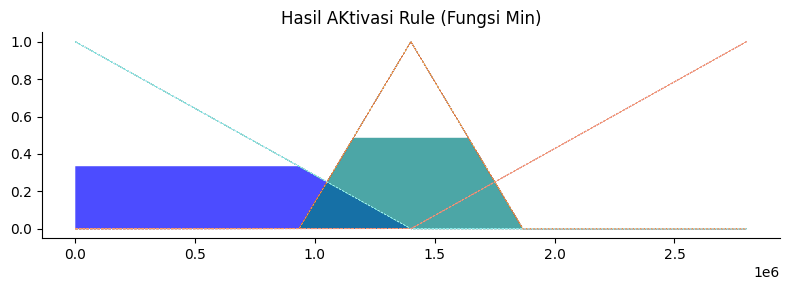

In [41]:
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r1, facecolor='b', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedikit, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r2, facecolor='teal', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedang, 'teal', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r3, facecolor='r', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedikit, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r4, facecolor='m', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_banyak, 'm', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r5, facecolor='chartreuse', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedikit, 'chartreuse', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r6, facecolor='y', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedang, 'y', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r7, facecolor='aqua', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedikit, 'aqua', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r8, facecolor='beige', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_banyak, 'beige', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r9, facecolor='black', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedang, 'black', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r10, facecolor='brown', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_banyak, 'brown', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r11, facecolor='chocolate', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedang, 'chocolate', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r12, facecolor='coral', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_banyak, 'coral', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r13, facecolor='cyan', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedikit, 'cyan', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r14, facecolor='fuchsia', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedang, 'fuchsia', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r15, facecolor='gold', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedang, 'gold', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r16, facecolor='khaki', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_banyak, 'khaki', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r17, facecolor='lavender', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedikit, 'lavender', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu_dapur, produksi0, produksi_activation_r18, facecolor='salmon', alpha=0.7)
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_banyak, 'salmon', linewidth=0.5, linestyle='--')
ax0.set_title('Hasil AKtivasi Rule (Fungsi Min)')

# tambahan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom
    ax.get_yaxis().tick_left
plt.tight_layout()

In [42]:
aggregated = np.fmax(produksi_activation_r1,
                     np.fmax(produksi_activation_r2,
                             np.fmax(produksi_activation_r3,
                                     np.fmax(produksi_activation_r4,
                                             np.fmax(produksi_activation_r5,
                                                     np.fmax(produksi_activation_r6,
                                                             np.fmax(produksi_activation_r7,
                                                                     np.fmax(produksi_activation_r8,
                                                                             np.fmax(produksi_activation_r9,
                                                                                     np.fmax(produksi_activation_r10,
                                                                                             np.fmax(produksi_activation_r11,
                                                                                                     np.fmax(produksi_activation_r12,
                                                                                                             np.fmax(produksi_activation_r13,
                                                                                                                     np.fmax(produksi_activation_r14,
                                                                                                                             np.fmax(produksi_activation_r15,
                                                                                                                                     np.fmax(produksi_activation_r16,
                                                                                                                                             np.fmax(produksi_activation_r17, produksi_activation_r18)))))))))))))))))
produksi = fuzz.defuzz(x_produksi_bumbu_dapur, aggregated, 'lom')
produksi_activation = fuzz.interp_membership(x_produksi_bumbu_dapur, aggregated, produksi)

print("Produksi Bumbu Dapur : ", produksi, "TON")


Produksi Bumbu Dapur :  1640669 TON


Text(0.5, 1.0, 'Aggregated membership and result (line)')

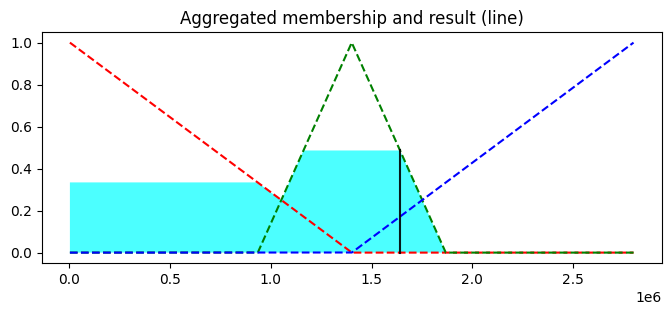

In [43]:
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedikit, 'r', linewidth=1.5, linestyle='--')
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedang, 'g', linewidth=1.5, linestyle='--')
ax0.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_banyak, 'b', linewidth=1.5, linestyle='--')

ax0.fill_between(x_produksi_bumbu_dapur, produksi0, aggregated, facecolor='aqua', alpha=0.7)
ax0.plot([produksi, produksi], [0, produksi_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title("Aggregated membership and result (line)")